In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df  = pd.read_csv('ShopifyData\data.csv', parse_dates=['created_at'])

In [6]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


There are no null values in any columns.

In [18]:
df[['order_amount', 'total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


a. The AOV is calculated by taking the total revenue and dividing by the number of orders. The AOV refers to the average amount that customers spend each time they place an order. The AOV value is $3145.13, which seems quite high. The standard deviation for order_amount is also very high indicating that the data points are very dispersed around the average value.

The AOV can be misleading as there can be records with extremely high extremely low order values. The range as is seen from above is quite large (70400 - 90). We need to find these extreme values and recalculate the AOV to get a more accurate picture.

I created a boxplot to see how the values in the order_amount column are spread out.

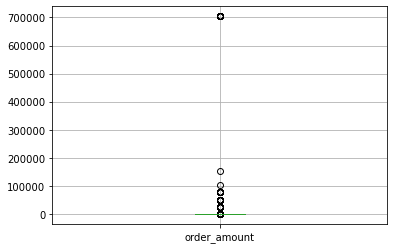

In [50]:
boxplot = df.boxplot(column =['order_amount'])
boxplot.plot()

plt.show()

We can see 704000 as being way out of the interquartile range here.

Also, the AOV is calculated by taking the sum of all orders divided by the number of rows(records). We also need to take into account the items per order. For this, I have added a new feature - per_order_value - that gives the price per shoe ordered. 

In [16]:
df_copy = df.copy()
df_copy = df_copy[['shop_id', 'order_amount', 'total_items']]
df_copy

df_copy['per_order_value'] = df_copy['order_amount']/df_copy['total_items']
df_copy.head()

,shop_id,order_amount,total_items,per_order_value
0,53,224,2,112.0
1,92,90,1,90.0
2,44,144,1,144.0
3,18,156,1,156.0
4,18,156,1,156.0


In [17]:
df_copy[['per_order_value']].describe()

,per_order_value
count,5000.000000
mean,387.742800
std,2441.963725
min,90.000000
25%,133.000000
50%,153.000000
75%,169.000000
max,25725.000000


We see that the average is reduced to 387.74. We observe that the same model of shoe is being sold at $90 as well as $25725.

In [49]:
df_copy.sort_values('per_order_value',ascending=False)

,shop_id,order_amount,total_items,per_order_value
4420,78,77175,3,25725.0
2906,78,77175,3,25725.0
4505,78,25725,1,25725.0
493,78,51450,2,25725.0
2452,78,51450,2,25725.0
...,...,...,...,...
2714,92,180,2,90.0
3915,92,180,2,90.0
4760,92,90,1,90.0
2128,92,180,2,90.0


In [53]:
df_copy.sort_values('total_items',ascending=False)

,shop_id,order_amount,total_items,per_order_value
2297,42,704000,2000,352.0
4056,42,704000,2000,352.0
520,42,704000,2000,352.0
3332,42,704000,2000,352.0
60,42,704000,2000,352.0
...,...,...,...,...
1408,16,156,1,156.0
3367,21,142,1,142.0
1410,97,162,1,162.0
3364,44,144,1,144.0


The pricing per shoe by shop 78 is quite high compared to the rest. The total items ordered by shop 42 is also on the extreme side compared to others.

b. Trimmed mean and median might be a more accurate metric for the dataset. 

In [31]:
stats.trim_mean(df_copy['order_amount'], 0.1)

287.39075

The mean after removing 10% of the lowest and highest order amounts is 287.39.

The median as given above by describe function is 284 (the median corresponds to the 50th percentile). Median Order Value is a more robust metric since it is not influenced by outliers that could skew the results. 